In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [27]:
def h(x, theta):
    return sigmoid(x.dot(theta))

In [37]:
def loss(x, y, theta):
    n = x.shape[0]
    return - (1 / n) * np.sum(y * np.log(h(x, theta)) + (1 - y) * np.log(1 - h(x, theta)))

In [80]:
def transform_x(x, degree=2):
    return np.column_stack([x**i for i in range(1, degree + 1)])

In [29]:
def gradient(x, y, theta):
    n = x.shape[0]
    grad_theta = np.zeros(theta.shape[0])
    for j in range(theta.shape[0]):
        grad_theta[j] = np.sum((h(x, theta) - y) * x[:, j])
        
    return grad_theta

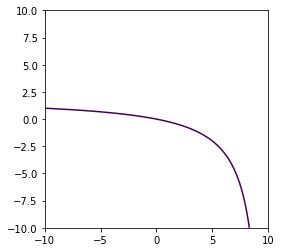

In [2]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)

F = X*Y - 2*X - 10*Y

plt.figure(figsize=(4, 4))
plt.contour(X, Y, F, [0])
plt.show()

In [3]:
data = pd.read_csv('resources/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,result
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [129]:
X = data.values[:, :-1]
Y = data.values[:, -1]
X = np.column_stack([np.ones(X.shape[0]), X])

limit = int(X.shape[0]*.8)

train_x = X[:limit]
val_x = X[limit:]

train_y = Y[:limit]
val_y = Y[limit:]

train_x = transform_x(train_x, 10)
val_x = transform_x(val_x, 10)

# ======= Normalization =======
max_train_x = np.max(train_x, axis=0)
max_val_x = np.max(val_x, axis=0)

min_train_x = np.min(train_x, axis=0)
min_val_x = np.min(val_x, axis=0)

norm_train_x = train_x / (max_train_x - min_train_x + 1)
norm_val_x = val_x / (max_val_x - min_val_x + 1)

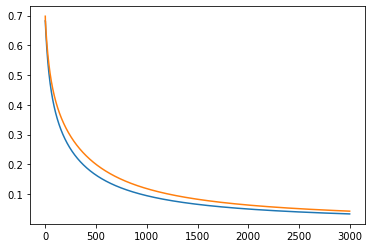

In [131]:
Epoch = 3000
alpha = 1.8e-4

theta = 1e-3*np.random.random(train_x.shape[1])

_train_loss = []
_val_loss = []

for epoch in range(Epoch):
    theta = theta - alpha * gradient(norm_train_x, train_y, theta)
    _train_l = loss(norm_train_x, train_y, theta)
    _val_l = loss(norm_val_x, val_y, theta)
    _train_loss.append(_train_l)
    _val_loss.append(_val_l)
    
plt.plot(_train_loss)
plt.plot(_val_loss)
plt.show()

In [124]:
for i in range(100):
    print(val_y[i], h(norm_val_x[i], theta))

1.0 0.9998614376637757
1.0 0.8969097451207589
1.0 0.8969097451207589
1.0 0.9239173437519369
1.0 0.7812126975341976
0.0 0.10642701347837626
0.0 0.04477643762007472
1.0 0.9791953514367192
0.0 0.35003098922476505
0.0 0.015916321398526497
0.0 0.015916321398526497
0.0 0.10712486217449808
1.0 0.880428431450294
1.0 0.9654012886273969
0.0 0.0009311632160325436
1.0 0.880428431450294
0.0 0.039511205052005685
0.0 0.039511205052005685
1.0 0.9675889487710365
1.0 0.9756329048505487
0.0 5.217223883243506e-06
1.0 0.941913227319206
1.0 0.8357666895177971
1.0 0.9530940243555588
0.0 0.06441780956501217
0.0 0.028320316208976053
0.0 0.019280779041765377
0.0 0.010271897200186753
0.0 0.0013634568200538769
0.0 0.010271897200186753
0.0 0.03528417562074953
0.0 0.019280779041765377
1.0 0.9821252444074635
0.0 0.023602110481131165
1.0 0.8528689091626253
1.0 0.8426946052782084
1.0 0.7077233350918115
1.0 0.8384021734042509
1.0 0.9423823006377762
1.0 0.7077233350918115
1.0 0.8263419334218045
0.0 0.011937710107406524
